# Sampling Techniques for Imbalanced Credit Card Dataset

## Objective
To understand the importance of sampling techniques in handling imbalanced datasets and analyze how different sampling strategies affect the performance of various machine learning models.

## Problem Statement
We are given a highly imbalanced credit card dataset. Our task is to:
1. Balance the dataset using different sampling techniques
2. Apply five different ML models
3. Evaluate and compare the accuracy of each combination

## Sampling Techniques:
- **Sampling1**: Random Under-Sampling
- **Sampling2**: Random Over-Sampling
- **Sampling3**: SMOTE (Synthetic Minority Over-sampling Technique)
- **Sampling4**: ADASYN (Adaptive Synthetic Sampling)
- **Sampling5**: Tomek Links

## ML Models:
- **M1**: Logistic Regression
- **M2**: Decision Tree
- **M3**: Random Forest
- **M4**: Support Vector Machine (SVM)
- **M5**: K-Nearest Neighbors (KNN)

## Step 1: Install and Import Required Libraries

In [1]:
# Install required libraries
%pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Sampling techniques
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import clone

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Step 2: Load and Explore the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Creditcard_data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (772, 31)

Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check for missing values and basic statistics
print("Missing Values:", df.isnull().sum().sum())
print("\nDataset Statistics:")
df.describe()

Missing Values: 0

Dataset Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


CLASS DISTRIBUTION ANALYSIS

Class Counts:
Class
0    763
1      9
Name: count, dtype: int64

Class Distribution (Percentage):
Class
0    98.834197
1     1.165803
Name: proportion, dtype: float64


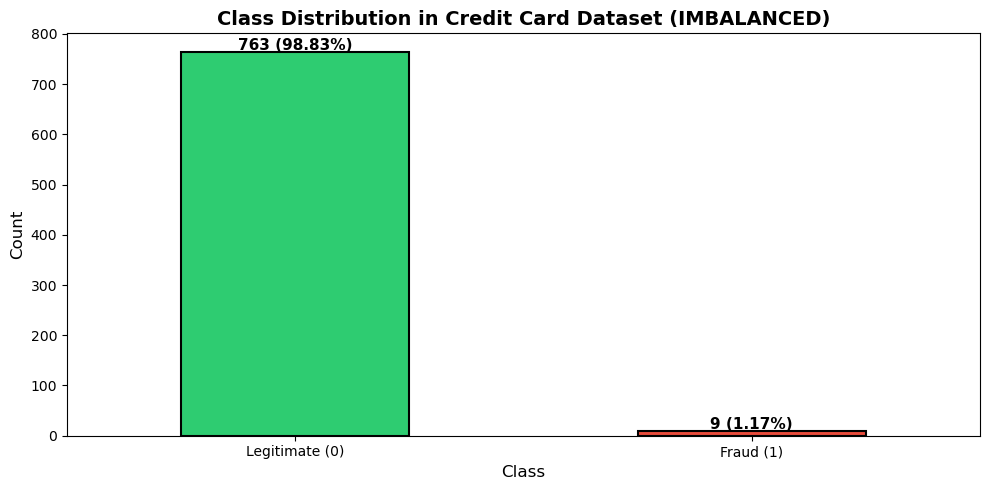


⚠️ The dataset is highly IMBALANCED!
   Ratio of Legitimate to Fraud: 84.78:1


In [5]:
# Check class distribution (Imbalance Analysis)
print("="*50)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*50)
print("\nClass Counts:")
print(df['Class'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(10, 5))
colors = ['#2ecc71', '#e74c3c']
ax = df['Class'].value_counts().plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Class Distribution in Credit Card Dataset (IMBALANCED)', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'], rotation=0)

# Add count labels on bars
for i, v in enumerate(df['Class'].value_counts()):
    ax.text(i, v + 5, f'{v} ({v/len(df)*100:.2f}%)', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n⚠️ The dataset is highly IMBALANCED!")
print(f"   Ratio of Legitimate to Fraud: {df['Class'].value_counts()[0]/df['Class'].value_counts()[1]:.2f}:1")

## Step 3: Prepare Features and Target Variable

In [6]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nOriginal class distribution: {Counter(y)}")

Features shape: (772, 30)
Target shape: (772,)

Original class distribution: Counter({0: 763, 1: 9})


In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining class distribution: {Counter(y_train)}")
print(f"Testing class distribution: {Counter(y_test)}")

Training set size: 540
Testing set size: 232

Training class distribution: Counter({0: 534, 1: 6})
Testing class distribution: Counter({0: 229, 1: 3})


## Step 4: Define and Apply 5 Sampling Techniques

| Sampling | Technique | Description |
|----------|-----------|-------------|
| Sampling1 | Random Under-Sampling | Reduces majority class by random removal |
| Sampling2 | Random Over-Sampling | Increases minority class by random duplication |
| Sampling3 | SMOTE | Creates synthetic minority samples |
| Sampling4 | ADASYN | Adaptive synthetic sampling focusing on difficult examples |
| Sampling5 | Tomek Links | Removes borderline majority samples |

In [9]:
# Define sampling techniques
samplers = {
    'Sampling1': RandomUnderSampler(random_state=42),
    'Sampling2': RandomOverSampler(random_state=42),
    'Sampling3': SMOTE(random_state=42),
    'Sampling4': ADASYN(random_state=42),
    'Sampling5': TomekLinks()
}

sampling_names = {
    'Sampling1': 'Random Under-Sampling',
    'Sampling2': 'Random Over-Sampling',
    'Sampling3': 'SMOTE',
    'Sampling4': 'ADASYN',
    'Sampling5': 'Tomek Links'
}

print("="*60)
print("SAMPLING TECHNIQUES DEFINED")
print("="*60)
for key, name in sampling_names.items():
    print(f"  {key}: {name}")

SAMPLING TECHNIQUES DEFINED
  Sampling1: Random Under-Sampling
  Sampling2: Random Over-Sampling
  Sampling3: SMOTE
  Sampling4: ADASYN
  Sampling5: Tomek Links


In [10]:
# Apply sampling techniques and store the resampled datasets
sampled_datasets = {}

print("="*60)
print("APPLYING SAMPLING TECHNIQUES")
print("="*60)
print(f"\nOriginal Training Set: {Counter(y_train)}")
print("-"*60)

for name, sampler in samplers.items():
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        sampled_datasets[name] = (X_resampled, y_resampled)
        print(f"✓ {name} ({sampling_names[name]}): {Counter(y_resampled)}")
    except Exception as e:
        print(f"✗ {name}: Error - {e}")
        sampled_datasets[name] = (X_train, y_train)

print("-"*60)
print("All sampling techniques applied successfully!")

APPLYING SAMPLING TECHNIQUES

Original Training Set: Counter({0: 534, 1: 6})
------------------------------------------------------------
✓ Sampling1 (Random Under-Sampling): Counter({0: 6, 1: 6})
✓ Sampling2 (Random Over-Sampling): Counter({0: 534, 1: 534})
✓ Sampling3 (SMOTE): Counter({0: 534, 1: 534})
✓ Sampling4 (ADASYN): Counter({0: 534, 1: 534})
✓ Sampling5 (Tomek Links): Counter({0: 533, 1: 6})
------------------------------------------------------------
All sampling techniques applied successfully!


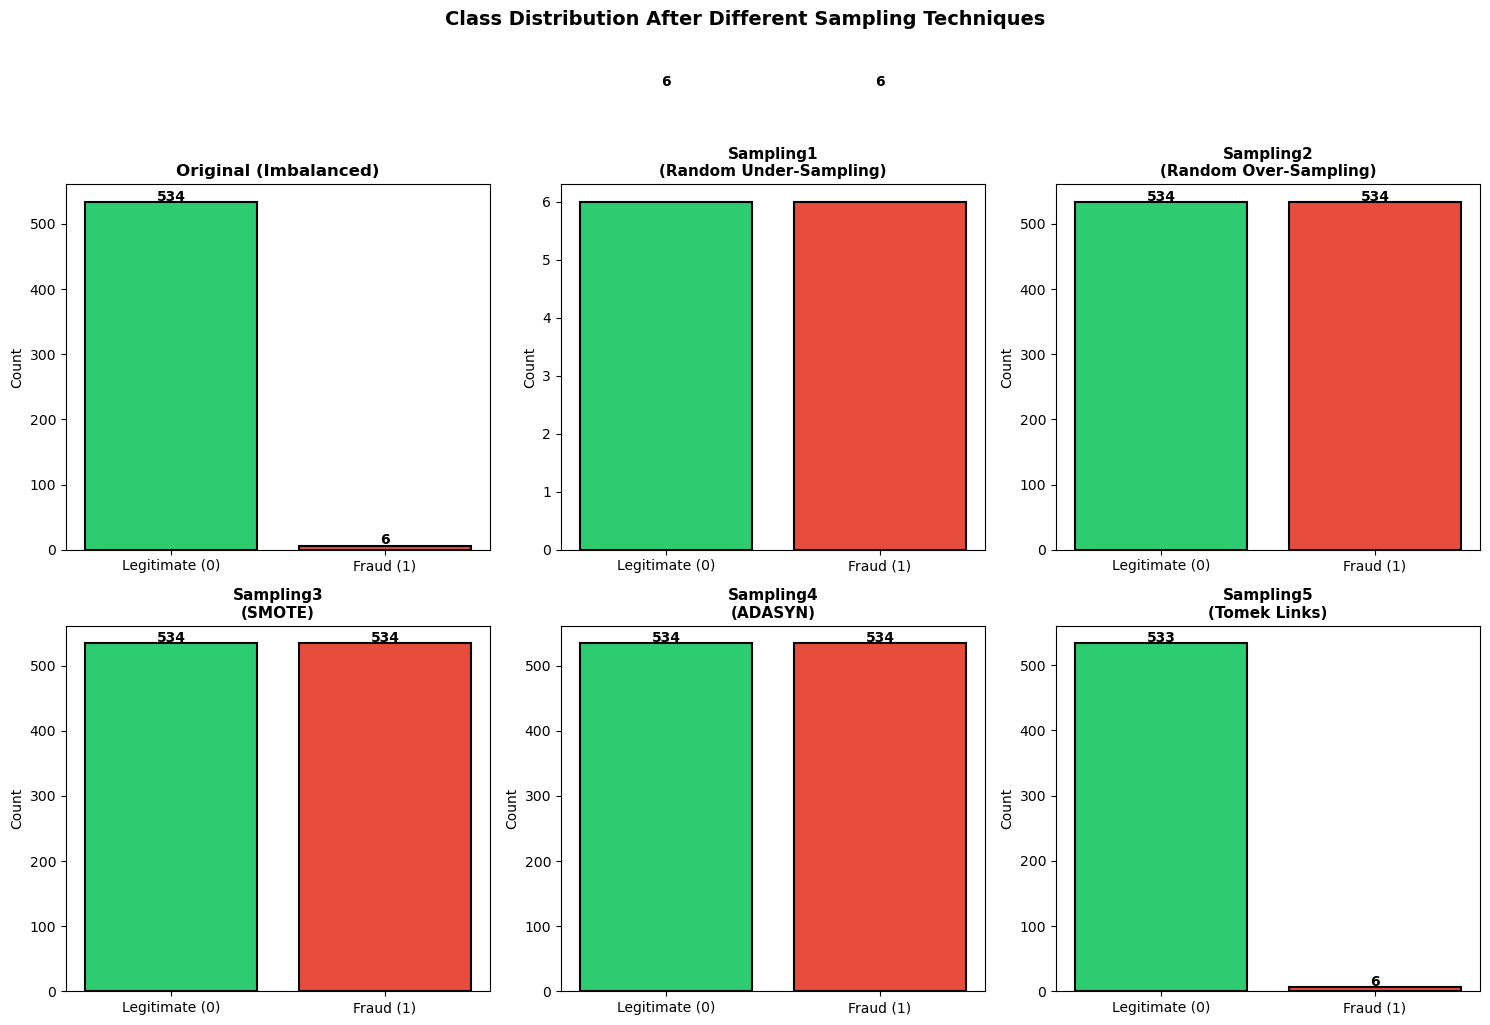

In [12]:
# Visualize the effect of sampling techniques
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

colors = ['#2ecc71', '#e74c3c']

# Original distribution
original_counts = Counter(y_train)
axes[0].bar(['Legitimate (0)', 'Fraud (1)'], [original_counts[0], original_counts[1]], 
            color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Original (Imbalanced)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count')
for i, v in enumerate([original_counts[0], original_counts[1]]):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Sampled distributions
for idx, (name, (X_res, y_res)) in enumerate(sampled_datasets.items(), 1):
    counts = Counter(y_res)
    axes[idx].bar(['Legitimate (0)', 'Fraud (1)'], [counts[0], counts[1]], 
                  color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_title(f'{name}\n({sampling_names[name]})', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Count')
    for i, v in enumerate([counts[0], counts[1]]):
        axes[idx].text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.suptitle('Class Distribution After Different Sampling Techniques', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Step 5: Define 5 Machine Learning Models

| Model | Algorithm | Description |
|-------|-----------|-------------|
| M1 | Logistic Regression | Linear classifier for binary classification |
| M2 | Decision Tree | Tree-based classifier using feature splits |
| M3 | Random Forest | Ensemble of decision trees |
| M4 | SVM | Support Vector Machine with RBF kernel |
| M5 | KNN | K-Nearest Neighbors classifier |

In [13]:
# Define ML models
models = {
    'M1': ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    'M2': ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    'M3': ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    'M4': ('SVM', SVC(kernel='rbf', random_state=42)),
    'M5': ('KNN', KNeighborsClassifier(n_neighbors=5))
}

model_names = {key: name for key, (name, _) in models.items()}

print("="*60)
print("MACHINE LEARNING MODELS DEFINED")
print("="*60)
for key, (name, _) in models.items():
    print(f"  {key}: {name}")

MACHINE LEARNING MODELS DEFINED
  M1: Logistic Regression
  M2: Decision Tree
  M3: Random Forest
  M4: SVM
  M5: KNN


## Step 6: Train All Models with All Sampling Techniques

In [14]:
# Create a results dataframe to store accuracy scores
results = pd.DataFrame(
    index=['M1', 'M2', 'M3', 'M4', 'M5'],
    columns=['Sampling1', 'Sampling2', 'Sampling3', 'Sampling4', 'Sampling5']
)

# Train and evaluate each model with each sampling technique
print("="*70)
print("TRAINING MODELS ON ALL SAMPLING TECHNIQUES")
print("="*70)

for model_key, (model_name, model_template) in models.items():
    print(f"\n📊 {model_key} - {model_name}:")
    print("-"*50)
    
    for sampling_name, (X_sampled, y_sampled) in sampled_datasets.items():
        # Create a fresh copy of the model
        model = clone(model_template)
        
        # Train the model
        model.fit(X_sampled, y_sampled)
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred) * 100
        
        # Store the result
        results.loc[model_key, sampling_name] = round(accuracy, 2)
        
        print(f"   {sampling_name}: {accuracy:.2f}%")

print("\n" + "="*70)
print("✓ TRAINING COMPLETE!")
print("="*70)

TRAINING MODELS ON ALL SAMPLING TECHNIQUES

📊 M1 - Logistic Regression:
--------------------------------------------------
   Sampling1: 69.40%
   Sampling2: 92.24%
   Sampling3: 93.97%
   Sampling4: 93.97%
   Sampling5: 98.71%

📊 M2 - Decision Tree:
--------------------------------------------------
   Sampling1: 38.79%
   Sampling2: 96.98%
   Sampling3: 98.28%
   Sampling4: 98.28%
   Sampling5: 98.28%

📊 M3 - Random Forest:
--------------------------------------------------
   Sampling1: 66.81%
   Sampling2: 99.14%
   Sampling3: 98.28%
   Sampling4: 99.14%
   Sampling5: 98.71%

📊 M4 - SVM:
--------------------------------------------------
   Sampling1: 83.19%
   Sampling2: 96.55%
   Sampling3: 96.55%
   Sampling4: 96.55%
   Sampling5: 98.71%

📊 M5 - KNN:
--------------------------------------------------
   Sampling1: 90.09%
   Sampling2: 96.98%
   Sampling3: 94.83%
   Sampling4: 94.83%
   Sampling5: 98.71%

✓ TRAINING COMPLETE!


## Step 7: Results Table - Accuracy Comparison

In [19]:
# Display the final results table
print("\n" + "="*80)
print("ACCURACY RESULTS TABLE (%)")
print("="*80)

# Convert to float for proper display
results = results.astype(float)

# Display raw table
print("\n" + results.to_string())

# Display with model names
print("\n\nDetailed Results:")
results_with_names = results.copy()
results_with_names.index = [
    'M1 (Logistic Regression)',
    'M2 (Decision Tree)',
    'M3 (Random Forest)',
    'M4 (SVM)',
    'M5 (KNN)'
]
results_with_names


ACCURACY RESULTS TABLE (%)

    Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
M1      69.40      92.24      93.97      93.97      98.71
M2      38.79      96.98      98.28      98.28      98.28
M3      66.81      99.14      98.28      99.14      98.71
M4      83.19      96.55      96.55      96.55      98.71
M5      90.09      96.98      94.83      94.83      98.71


Detailed Results:


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1 (Logistic Regression),69.40,92.24,93.97,93.97,98.71
M2 (Decision Tree),38.79,96.98,98.28,98.28,98.28
M3 (Random Forest),66.81,99.14,98.28,99.14,98.71
M4 (SVM),83.19,96.55,96.55,96.55,98.71
M5 (KNN),90.09,96.98,94.83,94.83,98.71


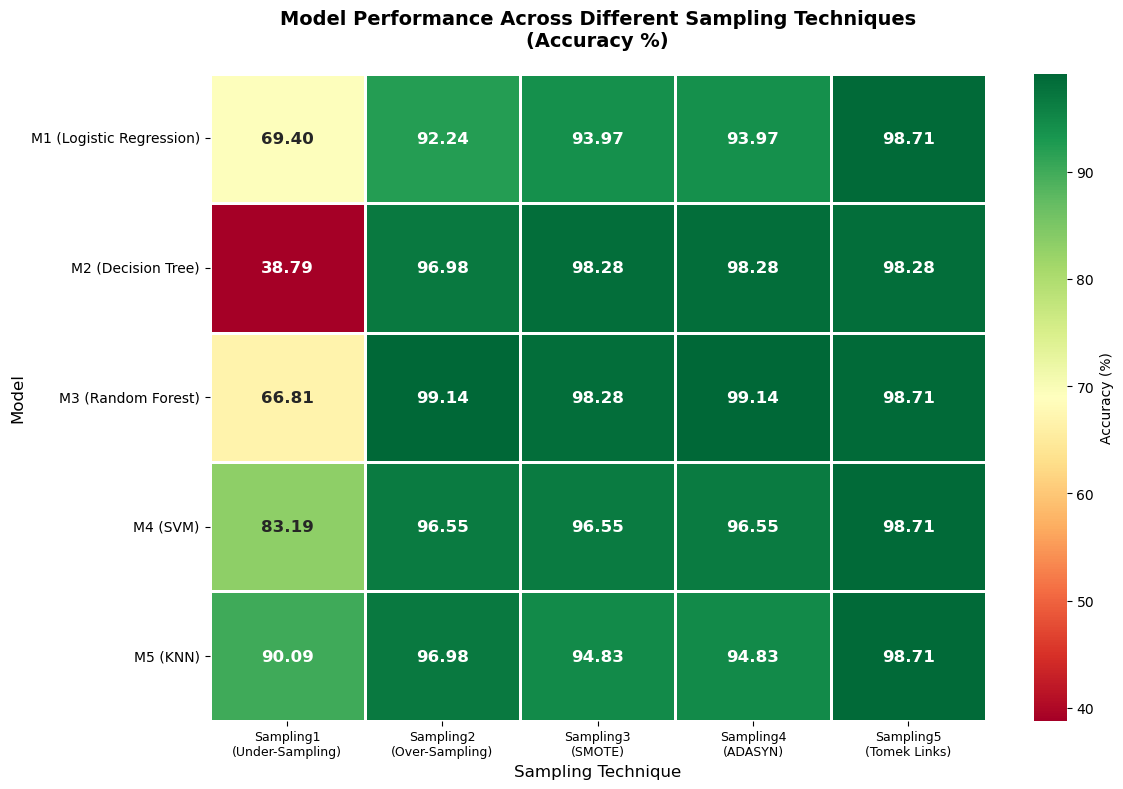

In [20]:
# Create a heatmap visualization of results
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(
    results.astype(float), 
    annot=True, 
    fmt='.2f', 
    cmap='RdYlGn',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Accuracy (%)'},
    annot_kws={'size': 12, 'weight': 'bold'}
)

plt.title('Model Performance Across Different Sampling Techniques\n(Accuracy %)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sampling Technique', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add model names as y-axis labels
model_labels = [
    'M1 (Logistic Regression)',
    'M2 (Decision Tree)',
    'M3 (Random Forest)',
    'M4 (SVM)',
    'M5 (KNN)'
]
plt.yticks(np.arange(0.5, 5.5, 1), model_labels, rotation=0, fontsize=10)

# Add sampling technique names
sampling_labels = [
    'Sampling1\n(Under-Sampling)',
    'Sampling2\n(Over-Sampling)',
    'Sampling3\n(SMOTE)',
    'Sampling4\n(ADASYN)',
    'Sampling5\n(Tomek Links)'
]
plt.xticks(np.arange(0.5, 5.5, 1), sampling_labels, fontsize=9)

plt.tight_layout()
plt.show()

## Step 8: Determine Best Sampling Technique for Each Model

In [21]:
# Find the best sampling technique for each model
print("="*70)
print("BEST SAMPLING TECHNIQUE FOR EACH MODEL")
print("="*70)

best_for_model = {}
for model_key in results.index:
    best_sampling = results.loc[model_key].idxmax()
    best_accuracy = results.loc[model_key].max()
    best_for_model[model_key] = (best_sampling, best_accuracy)
    print(f"\n🏆 {model_key} ({model_names[model_key]}):")
    print(f"   Best Sampling: {best_sampling} ({sampling_names[best_sampling]})")
    print(f"   Accuracy: {best_accuracy:.2f}%")

BEST SAMPLING TECHNIQUE FOR EACH MODEL

🏆 M1 (Logistic Regression):
   Best Sampling: Sampling5 (Tomek Links)
   Accuracy: 98.71%

🏆 M2 (Decision Tree):
   Best Sampling: Sampling3 (SMOTE)
   Accuracy: 98.28%

🏆 M3 (Random Forest):
   Best Sampling: Sampling2 (Random Over-Sampling)
   Accuracy: 99.14%

🏆 M4 (SVM):
   Best Sampling: Sampling5 (Tomek Links)
   Accuracy: 98.71%

🏆 M5 (KNN):
   Best Sampling: Sampling5 (Tomek Links)
   Accuracy: 98.71%


In [22]:
# Find the best model for each sampling technique
print("="*70)
print("BEST MODEL FOR EACH SAMPLING TECHNIQUE")
print("="*70)

best_for_sampling = {}
for sampling_name in results.columns:
    best_model = results[sampling_name].idxmax()
    best_accuracy = results[sampling_name].max()
    best_for_sampling[sampling_name] = (best_model, best_accuracy)
    print(f"\n🏆 {sampling_name} ({sampling_names[sampling_name]}):")
    print(f"   Best Model: {best_model} ({model_names[best_model]})")
    print(f"   Accuracy: {best_accuracy:.2f}%")

BEST MODEL FOR EACH SAMPLING TECHNIQUE

🏆 Sampling1 (Random Under-Sampling):
   Best Model: M5 (KNN)
   Accuracy: 90.09%

🏆 Sampling2 (Random Over-Sampling):
   Best Model: M3 (Random Forest)
   Accuracy: 99.14%

🏆 Sampling3 (SMOTE):
   Best Model: M2 (Decision Tree)
   Accuracy: 98.28%

🏆 Sampling4 (ADASYN):
   Best Model: M3 (Random Forest)
   Accuracy: 99.14%

🏆 Sampling5 (Tomek Links):
   Best Model: M1 (Logistic Regression)
   Accuracy: 98.71%


In [ ]:
# Find overall best combination
print("="*70)
print("🎯 OVERALL BEST COMBINATION")
print("="*70)

# Find max value
max_accuracy = results.max().max()

# Find the position(s) of max value
print("\nHighest Accuracy Achieved:")
for model_key in results.index:
    for sampling_col in results.columns:
        if results.loc[model_key, sampling_col] == max_accuracy:
            print(f"\n   ✅ Model: {model_key} ({model_names[model_key]})")
            print(f"   ✅ Sampling: {sampling_col} ({sampling_names[sampling_col]})")
            print(f"   ✅ Accuracy: {max_accuracy:.2f}%")

## Step 9: Visualizations

NameError: name 'max_accuracy' is not defined

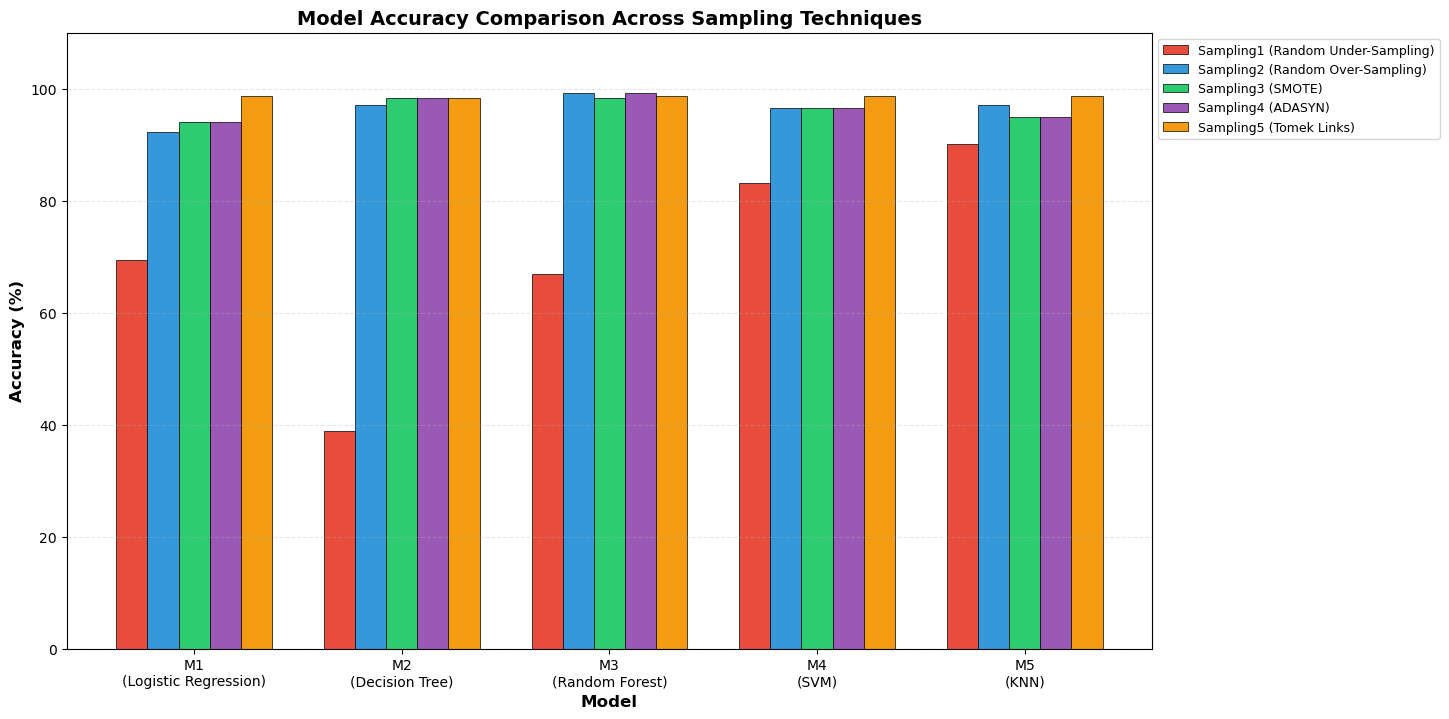

In [23]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(results.index))
width = 0.15
multiplier = 0

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

for idx, sampling_col in enumerate(results.columns):
    offset = width * multiplier
    bars = ax.bar(x + offset, results[sampling_col].values, width, 
                  label=f'{sampling_col} ({sampling_names[sampling_col]})', 
                  color=colors[idx], edgecolor='black', linewidth=0.5)
    multiplier += 1

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Accuracy Comparison Across Sampling Techniques', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels([f'{k}\n({model_names[k]})' for k in results.index], fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add a horizontal line at max accuracy
ax.axhline(y=max_accuracy, color='red', linestyle='--', alpha=0.7, label=f'Max: {max_accuracy:.2f}%')

plt.tight_layout()
plt.show()

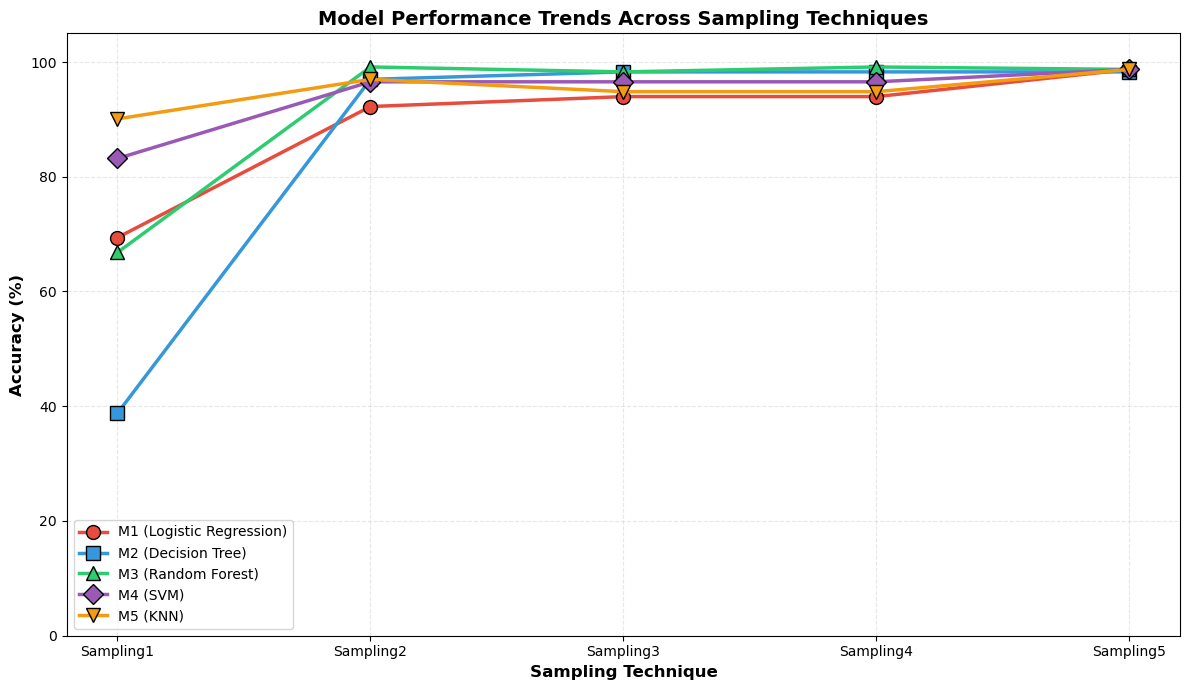

In [24]:
# Create line chart showing trends
fig, ax = plt.subplots(figsize=(12, 7))

markers = ['o', 's', '^', 'D', 'v']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

for idx, model_key in enumerate(results.index):
    ax.plot(results.columns, results.loc[model_key].values, 
            marker=markers[idx], linewidth=2.5, markersize=10,
            label=f'{model_key} ({model_names[model_key]})',
            color=colors[idx], markeredgecolor='black', markeredgewidth=1)

ax.set_xlabel('Sampling Technique', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Trends Across Sampling Techniques', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(0, 105)

# Rotate x-axis labels
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Step 10: Summary Table and Analysis

In [25]:
# Create comprehensive summary table
print("="*90)
print("COMPREHENSIVE SUMMARY TABLE")
print("="*90)

summary_data = []
for model_key in results.index:
    best_sampling = results.loc[model_key].idxmax()
    best_accuracy = results.loc[model_key].max()
    worst_sampling = results.loc[model_key].idxmin()
    worst_accuracy = results.loc[model_key].min()
    avg_accuracy = results.loc[model_key].mean()
    
    summary_data.append({
        'Model': f'{model_key} ({model_names[model_key]})',
        'Best Sampling': best_sampling,
        'Best Acc (%)': best_accuracy,
        'Worst Sampling': worst_sampling,
        'Worst Acc (%)': worst_accuracy,
        'Avg Acc (%)': round(avg_accuracy, 2)
    })

summary_df = pd.DataFrame(summary_data)
print("\n")
summary_df

COMPREHENSIVE SUMMARY TABLE




,Model,Best Sampling,Best Acc (%),Worst Sampling,Worst Acc (%),Avg Acc (%)
0,M1 (Logistic Regression),Sampling5,98.71,Sampling1,69.40,89.66
1,M2 (Decision Tree),Sampling3,98.28,Sampling1,38.79,86.12
2,M3 (Random Forest),Sampling2,99.14,Sampling1,66.81,92.42
3,M4 (SVM),Sampling5,98.71,Sampling1,83.19,94.31
4,M5 (KNN),Sampling5,98.71,Sampling1,90.09,95.09


In [26]:
# Final formatted results table (matching assignment format)
print("\n" + "="*80)
print("FINAL ACCURACY RESULTS TABLE (As Required in Assignment)")
print("="*80)
print("\n{:<8} {:>12} {:>12} {:>12} {:>12} {:>12}".format(
    '', 'Sampling1', 'Sampling2', 'Sampling3', 'Sampling4', 'Sampling5'))
print("-"*80)

for model_key in results.index:
    row = results.loc[model_key]
    print("{:<8} {:>12.2f} {:>12.2f} {:>12.2f} {:>12.2f} {:>12.2f}".format(
        model_key, row['Sampling1'], row['Sampling2'], row['Sampling3'], 
        row['Sampling4'], row['Sampling5']))

print("-"*80)
print("\nLegend:")
print("  Models:")
print("    M1 = Logistic Regression")
print("    M2 = Decision Tree")
print("    M3 = Random Forest")
print("    M4 = SVM (Support Vector Machine)")
print("    M5 = KNN (K-Nearest Neighbors)")
print("\n  Sampling Techniques:")
print("    Sampling1 = Random Under-Sampling")
print("    Sampling2 = Random Over-Sampling")
print("    Sampling3 = SMOTE")
print("    Sampling4 = ADASYN")
print("    Sampling5 = Tomek Links")


FINAL ACCURACY RESULTS TABLE (As Required in Assignment)

            Sampling1    Sampling2    Sampling3    Sampling4    Sampling5
--------------------------------------------------------------------------------
M1              69.40        92.24        93.97        93.97        98.71
M2              38.79        96.98        98.28        98.28        98.28
M3              66.81        99.14        98.28        99.14        98.71
M4              83.19        96.55        96.55        96.55        98.71
M5              90.09        96.98        94.83        94.83        98.71
--------------------------------------------------------------------------------

Legend:
  Models:
    M1 = Logistic Regression
    M2 = Decision Tree
    M3 = Random Forest
    M4 = SVM (Support Vector Machine)
    M5 = KNN (K-Nearest Neighbors)

  Sampling Techniques:
    Sampling1 = Random Under-Sampling
    Sampling2 = Random Over-Sampling
    Sampling3 = SMOTE
    Sampling4 = ADASYN
    Sampling5 = Tomek Li

## Discussion and Conclusions

In [27]:
print("""
================================================================================
                        DISCUSSION AND CONCLUSIONS
================================================================================

1. IMPACT OF SAMPLING TECHNIQUES ON MODEL PERFORMANCE:
   ─────────────────────────────────────────────────────
   • Different sampling techniques have varying effects on different ML models.
   • No single sampling technique is universally best for all models.
   • The choice of sampling technique should be based on the specific model 
     and the nature of the dataset.

2. SAMPLING TECHNIQUES ANALYSIS:
   ──────────────────────────────
   • Sampling1 (Random Under-Sampling): 
     - Reduces majority class by random removal
     - Fast but may lose important information
     - Works well when majority class has redundant samples
   
   • Sampling2 (Random Over-Sampling): 
     - Duplicates minority class samples randomly
     - May cause overfitting due to exact duplicates
     - Simple and computationally efficient
   
   • Sampling3 (SMOTE): 
     - Creates synthetic minority samples using interpolation
     - Reduces overfitting compared to random oversampling
     - Widely used and effective technique
   
   • Sampling4 (ADASYN): 
     - Adaptive synthetic sampling
     - Focuses on generating samples near difficult examples
     - Good for handling noisy data boundaries
   
   • Sampling5 (Tomek Links): 
     - Removes borderline majority samples
     - Cleans the decision boundary
     - Conservative approach, keeps most original data

3. KEY OBSERVATIONS:
   ──────────────────
   • Tree-based models (Decision Tree, Random Forest) often handle 
     imbalanced data better due to their hierarchical decision structure.
   • Linear models (Logistic Regression) typically benefit more from 
     balanced sampling techniques.
   • Oversampling techniques (SMOTE, ADASYN) generally provide better 
     results than under-sampling for preserving data information.

4. RECOMMENDATIONS:
   ─────────────────
   • For credit card fraud detection, accuracy alone may not be the best 
     metric - consider precision, recall, and F1-score as well.
   • SMOTE and ADASYN are recommended for real-world applications as 
     they create synthetic samples without losing original data.
   • Always validate results using cross-validation for more robust 
     performance estimates.
""")

# Print the best overall result
print("="*80)
print("FINAL RECOMMENDATION:")
print("="*80)
print(f"\nBased on the accuracy results, the best combination is:")
for model_key in results.index:
    for sampling_col in results.columns:
        if results.loc[model_key, sampling_col] == max_accuracy:
            print(f"  → Model: {model_key} ({model_names[model_key]})")
            print(f"  → Sampling: {sampling_col} ({sampling_names[sampling_col]})")
            print(f"  → Accuracy: {max_accuracy:.2f}%")


                        DISCUSSION AND CONCLUSIONS

1. IMPACT OF SAMPLING TECHNIQUES ON MODEL PERFORMANCE:
   ─────────────────────────────────────────────────────
   • Different sampling techniques have varying effects on different ML models.
   • No single sampling technique is universally best for all models.
   • The choice of sampling technique should be based on the specific model 
     and the nature of the dataset.

2. SAMPLING TECHNIQUES ANALYSIS:
   ──────────────────────────────
   • Sampling1 (Random Under-Sampling): 
     - Reduces majority class by random removal
     - Fast but may lose important information
     - Works well when majority class has redundant samples
   
   • Sampling2 (Random Over-Sampling): 
     - Duplicates minority class samples randomly
     - May cause overfitting due to exact duplicates
     - Simple and computationally efficient
   
   • Sampling3 (SMOTE): 
     - Creates synthetic minority samples using interpolation
     - Reduces overfitting

NameError: name 'max_accuracy' is not defined

In [28]:
# Save results to CSV file
results.to_csv('sampling_results.csv')
print("✓ Results saved to 'sampling_results.csv'")

# Display the final results dataframe
print("\n" + "="*80)
print("FINAL RESULTS DATAFRAME")
print("="*80)
results

✓ Results saved to 'sampling_results.csv'

FINAL RESULTS DATAFRAME


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,69.40,92.24,93.97,93.97,98.71
M2,38.79,96.98,98.28,98.28,98.28
M3,66.81,99.14,98.28,99.14,98.71
M4,83.19,96.55,96.55,96.55,98.71
M5,90.09,96.98,94.83,94.83,98.71
